In [1]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

import random
import pickle

import time

import sys
sys.path.append("../../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [15]:
with open('../../data/pickle/20221105v1_30y.pickle', mode='rb') as f:
    ws = pickle.load(f)

In [3]:
all_member = pd.DataFrame()
for c in ws.country_leagues:
    output = pd.DataFrame()
    for l in c.leagues:
        for t in l.teams:
            for p in t.affilation_players:
                buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "現役"]]), 
                                    columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ", "pac", "sho", "pas", "dri", "def", "phy", "進退"])
                output = pd.concat([output, buff])
    all_member = pd.concat([all_member, output])

output = pd.DataFrame()
for p in ws.retire_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "引退"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    output = pd.concat([output, buff])
all_member = pd.concat([all_member, output])

output = pd.DataFrame()
for p in ws.free_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate,  p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "フリー"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    output = pd.concat([output, buff])
all_member = pd.concat([all_member, output])

In [16]:
output = pd.DataFrame()

for c in ws.country_leagues:
    output = pd.concat([output, c.players_result])

output = pd.concat([output, ws.players_result])
output = output.sort_values("年度")
ws.players_result = output

# 結果一覧

## リーグ・カップ戦結果

In [5]:
print("チーム一覧")
print()

for c in ws.country_leagues:
    for league_num in range(len(c.leagues)):
        print(c.leagues[league_num].name)
        print([[i, t.name] for i, t in enumerate(c.leagues[league_num].teams)])

    print()

for c in ws.country_leagues:
    for league_num in range(len(c.leagues)):
        display(c.leagues[league_num].champion)

    display(c.competition_result_top)

チーム一覧

premier
[[0, 'Everton'], [1, 'Leeds'], [2, 'Blackburn'], [3, 'Middlesbrough'], [4, 'AFC'], [5, 'Preston'], [6, 'Leicester'], [7, 'Millwall'], [8, 'Doncaster'], [9, 'Chelsea'], [10, 'Coventry'], [11, 'Fleetwood'], [12, 'Brighton'], [13, 'Accrington'], [14, 'Cardiff'], [15, 'Burnely'], [16, 'Chalton'], [17, 'WestHam'], [18, 'Northampton'], [19, 'ManchesterCity']]
Championship
[[0, 'Arsenal'], [1, 'Newcastle'], [2, 'Huddersfield'], [3, 'Brentford'], [4, 'Portsmouth'], [5, 'CrystalPalace'], [6, 'Dons'], [7, 'Reading'], [8, 'Ipswitch'], [9, 'Southampton'], [10, 'ManchesterUnited'], [11, 'Liverpool'], [12, 'Wolverhampton'], [13, 'Peterborough'], [14, 'Rotherham'], [15, 'ShefieldWednesday'], [16, 'Bristol'], [17, 'Crewe'], [18, 'HullCity'], [19, 'Burton']]
EFL1
[[0, 'Birmingham'], [1, 'Lincoln'], [2, 'AstonVilla'], [3, 'Tottenham'], [4, 'Nottingham'], [5, 'WBA'], [6, 'Blackpool'], [7, 'Wigan'], [8, 'Swansea'], [9, 'Gillingham'], [10, 'LutonTown'], [11, 'Oxford'], [12, 'SheffieldUnited'

,優勝,得点王
premier_2000,Nottingham,"Schyler(Nottingham), / 19点"
premier_2001,Nottingham,"Ova(Nottingham), / 23点"
premier_2002,Southampton,"Kaleel(WestHam), / 21点"
premier_2003,Everton,"Nicohlas(Brentford), / 21点"
premier_2004,Bristol,"Blessing(ManchesterUnited), / 20点"
premier_2005,Everton,"Avik(Arsenal), / 20点"
premier_2006,Blackburn,"Lance(Everton), Reynaldo(Wolverhampton), Aran(..."
premier_2007,WestHam,"Deontay(Brentford), / 23点"
premier_2008,Blackburn,"Masataka(Leeds), Aran(Blackburn), / 21点"
premier_2009,Fulham,"Waleed(Brentford), Ova(Fulham), / 21点"


,優勝,得点王
Championship_2000,Norwich,"Derick(Birmingham), / 25点"
Championship_2001,Preston,"Marquail(Reading), / 20点"
Championship_2002,Millwall,"Tramarion(Bristol), / 26点"
Championship_2003,Blackburn,"Jason(Liverpool), / 20点"
Championship_2004,Birmingham,"Daiton(Leicester), Carvin(Norwich), / 18点"
Championship_2005,Newcastle,"Feliciano(Newcastle), / 22点"
Championship_2006,Stoke,"Kendon(Stoke), Micheal(Birmingham), / 20点"
Championship_2007,Middlesbrough,"Whit(AstonVilla), / 25点"
Championship_2008,Birmingham,"Hope(Burnely), / 20点"
Championship_2009,Bristol,"Dasani(Oxford), Terry(Bristol), / 20点"


,優勝,得点王
EFL1_2000,AFC,"Lamere(AFC), / 23点"
EFL1_2001,Plymouth,"Hope(Blackpool), / 25点"
EFL1_2002,AFC,"Jayvonte(AFC), / 20点"
EFL1_2003,Swansea,"Ellie(Lincoln), / 20点"
EFL1_2004,Oxford,"Eliahu(Plymouth), / 23点"
EFL1_2005,Cardiff,"Jibreel(Blackpool), / 21点"
EFL1_2006,Fleetwood,"Akira(Gillingham), / 22点"
EFL1_2007,Plymouth,"Sydney(Accrington), / 25点"
EFL1_2008,AFC,"Reinhard(WBA), / 24点"
EFL1_2009,SheffieldUnited,"Gabryal(Coventry), Erasmo(Huddersfield), / 18点"


,年度,優勝,準優勝,得点王
FA杯_2000,2000,Liverpool(premier),ManchesterUnited(premier),"Blain(ManchesterUnited(premier)), / 8点"
FA杯_2001,2001,Arsenal(premier),Chelsea(premier),"Orland(Wolverhampton(premier)), / 7点"
FA杯_2002,2002,Nottingham(premier),ManchesterUnited(premier),"Camren(AstonVilla(premier)), / 6点"
FA杯_2003,2003,Everton(premier),Southampton(premier),"Mehkai(Southampton(premier)), / 6点"
FA杯_2004,2004,Arsenal(premier),AstonVilla(premier),"Blessing(ManchesterUnited(premier)), / 6点"
FA杯_2005,2005,Wolverhampton(premier),Southampton(premier),"Breck(Southampton(premier)), / 7点"
FA杯_2006,2006,Everton(premier),Arsenal(premier),"Eron(Everton(premier)), / 6点"
FA杯_2007,2007,Blackburn(premier),Brighton(premier),"Siosaia(WestHam(premier)), Dheeraj(Blackburn(p..."
FA杯_2008,2008,Chalton(premier),Blackburn(premier),"Dheeraj(Blackburn(premier)), Godwin(Chalton(pr..."
FA杯_2009,2009,Everton(premier),Blackburn(premier),"Deontay(Brentford(premier)), Thao(Everton(prem..."


,優勝,得点王
La Liga Santander_2000,Valencia,"Ezequiel(AtleticoDeMadrid), / 24点"
La Liga Santander_2001,AtleticoDeMadrid,"Tallen(Rayo), / 21点"
La Liga Santander_2002,Valencia,"Phineas(Getafe), / 21点"
La Liga Santander_2003,AtleticoDeMadrid,"Granvil(Almenia), / 22点"
La Liga Santander_2004,Mallorca,"Krishan(Rayo), / 25点"
La Liga Santander_2005,RealBetis,"Wright(Osasuna), / 24点"
La Liga Santander_2006,Osasuna,"Alden(Osasuna), / 22点"
La Liga Santander_2007,Osasuna,"Farrell(RealBetis), / 23点"
La Liga Santander_2008,Valencia,"Keimani(RacingSantander), / 21点"
La Liga Santander_2009,Vilarreal,"Bryce(Espanyol), / 25点"


,優勝,得点王
LaLiga SmartBank_2000,Catagena,"Dheeraj(Levante), Doran(Gijon), / 20点"
LaLiga SmartBank_2001,Elche,"Moataz(Huesca), Evan(Andorra), / 21点"
LaLiga SmartBank_2002,RacingSantander,"Yaakov(Granada), / 23点"
LaLiga SmartBank_2003,RealOviedo,"Imad(Ponferradina), / 23点"
LaLiga SmartBank_2004,RealSocidad,"Jayton(RealSocidad), / 23点"
LaLiga SmartBank_2005,RealOviedo,"Samuel(RealOviedo), / 26点"
LaLiga SmartBank_2006,UDLasPalmas,"Norvin(Numancia), / 21点"
LaLiga SmartBank_2007,RacingFerrol,"Waring(Algeciras), / 26点"
LaLiga SmartBank_2008,Eibar,"Quinzel(Sevilla), / 23点"
LaLiga SmartBank_2009,LinaresDeportivo,"Winfred(Ceuta), / 25点"


,優勝,得点王
Primera Division RFEF_2000,Coroba,"Eliahu(Leonesa), / 23点"
Primera Division RFEF_2001,Alcorcon,"Damarri(Lugo), / 27点"
Primera Division RFEF_2002,Ceuta,"Ryder(Leonesa), / 24点"
Primera Division RFEF_2003,Deporivo,"Tramaine(Leonesa), / 22点"
Primera Division RFEF_2004,Merida,"Margaret(SanSebastian), / 21点"
Primera Division RFEF_2005,Uniponstas,"Christofer(Intercity), Arval(Intercity), Sydne..."
Primera Division RFEF_2006,Intercity,"Omare(Burgos), / 20点"
Primera Division RFEF_2007,Badajoz,"Johann(Badajoz), / 21点"
Primera Division RFEF_2008,Ceuta,"Halston(Coroba), / 21点"
Primera Division RFEF_2009,Leonesa,"Daniyal(Deporivo), Francis(Castellon), / 23点"


,年度,優勝,準優勝,得点王
カラバオ杯_2000,2000,Espanyol(La Liga Santander),AtleticoDeMadrid(La Liga Santander),"Kirtan(Osasuna(La Liga Santander)), / 9点"
カラバオ杯_2001,2001,Celta(La Liga Santander),RealSocidad(La Liga Santander),"Javan(Celta(La Liga Santander)), / 6点"
カラバオ杯_2002,2002,AtleticoDeMadrid(La Liga Santander),Vilarreal(La Liga Santander),"Rohan(Barcelona(La Liga Santander)), Amine(Bar..."
カラバオ杯_2003,2003,Valencia(La Liga Santander),RealBetis(La Liga Santander),"Berton(Getafe(La Liga Santander)), Henrique(Ei..."
カラバオ杯_2004,2004,Getafe(La Liga Santander),Valencia(La Liga Santander),"Windle(Sevilla(La Liga Santander)), / 7点"
カラバオ杯_2005,2005,Almenia(La Liga Santander),Vilarreal(La Liga Santander),"Dheeraj(Osasuna(La Liga Santander)), Micheal(B..."
カラバオ杯_2006,2006,Osasuna(La Liga Santander),Rayo(La Liga Santander),"Alden(Osasuna(La Liga Santander)), / 6点"
カラバオ杯_2007,2007,Getafe(La Liga Santander),RealValladolid(La Liga Santander),"Lanny(Getafe(La Liga Santander)), / 6点"
カラバオ杯_2008,2008,Andorra(La Liga Santander),Osasuna(La Liga Santander),"Brooke(Vilarreal(La Liga Santander)), Kahmani(..."
カラバオ杯_2009,2009,RacingSantander(La Liga Santander),Ibiza(La Liga Santander),"Augusto(RacingSantander(La Liga Santander)), /..."


,優勝,得点王
Bundesliga_2000,Stuttgart,"Daizon(Stuttgart), Cyril(Augsburg), / 19点"
Bundesliga_2001,Augsburg,"Emmette(Koln), Cristino(Bochum), / 22点"
Bundesliga_2002,Bochum,"Luiz(Mainz), Emmette(Koln), / 20点"
Bundesliga_2003,Mainz,"Torrance(Augsburg), / 23点"
Bundesliga_2004,Braunschweig,"Adrien(Bochum), / 22点"
Bundesliga_2005,Mainz,"Celso(Leipzing), / 21点"
Bundesliga_2006,Leipzing,"Lavern(Leipzing), / 29点"
Bundesliga_2007,DynamoDresden,"Mehkai(Hoffenheim), Doc(DynamoDresden), Granvi..."
Bundesliga_2008,Bielefeld,"Sagar(Wolfsburg), / 27点"
Bundesliga_2009,DynamoDresden,"Vernell(Bochum), / 23点"


,優勝,得点王
2.Bundesliga_2000,Magdeburg,"Darry(GreutherFurch), / 24点"
2.Bundesliga_2001,StPauli,"Shaaz(Hannover), / 20点"
2.Bundesliga_2002,DynamoDresden,"Theoplis(DynamoDresden), / 21点"
2.Bundesliga_2003,Bremen,"Ewell(Braunschweig), / 21点"
2.Bundesliga_2004,Hannover,"Ivy(Vert), / 23点"
2.Bundesliga_2005,Dusseldorf,"Antrell(BorussiaMG), Broadus(Freiburg), / 19点"
2.Bundesliga_2006,Wolfsburg,"Tristyn(Larlsruher), Dolan(FSV), Dereke(MSV), ..."
2.Bundesliga_2007,Hamburger,"Milton(Meppen), / 22点"
2.Bundesliga_2008,Holstein,"Brooke(Holstein), / 25点"
2.Bundesliga_2009,Meppen,"Amyr(Waldhof), / 29点"


,優勝,得点王
3.bundeliga_2000,FSV,"Karey(Vert), Marino(Meppen), Keaton(LickersOff..."
3.bundeliga_2001,Elversberg,"Lisa(Meppen), Tyra(Zwickau), / 21点"
3.bundeliga_2002,Waldhof,"Roberto(Steinbach), / 28点"
3.bundeliga_2003,LickersOffenbach,"Markevis(LickersOffenbach), Rajan(TSV), / 19点"
3.bundeliga_2004,Ingolstadt,"Mohammed(WehenWiesbaden), / 22点"
3.bundeliga_2005,Aalen,"Roberto(Viktoria), Anselm(Hamburger), / 21点"
3.bundeliga_2006,Viktoria,"Heinrich(WehenWiesbaden), / 21点"
3.bundeliga_2007,LickersOffenbach,"Williard(Hallescher), / 22点"
3.bundeliga_2008,SSVUlm,"Laiden(SSVUlm), / 24点"
3.bundeliga_2009,Erzgebirge,"Bert(Schalke), / 20点"


,年度,優勝,準優勝,得点王
DFBポカール_2000,2000,Leipzing(Bundesliga),Schalke(Bundesliga),"Kunga(Bayern(Bundesliga)), / 5点"
DFBポカール_2001,2001,Stuttgart(Bundesliga),Braunschweig(Bundesliga),"Georg(Stuttgart(Bundesliga)), / 6点"
DFBポカール_2002,2002,Hoffenheim(Bundesliga),Augsburg(Bundesliga),"Ciaran(Bayern(Bundesliga)), Kassem(Augsburg(Bu..."
DFBポカール_2003,2003,Mainz(Bundesliga),Freiburg(Bundesliga),"Elih(Mainz(Bundesliga)), / 8点"
DFBポカール_2004,2004,Mainz(Bundesliga),Bochum(Bundesliga),"Elih(Mainz(Bundesliga)), Cyril(Mainz(Bundeslig..."
DFBポカール_2005,2005,Bielefeld(Bundesliga),Leipzing(Bundesliga),"Lavern(Leipzing(Bundesliga)), Lori(Bielefeld(B..."
DFBポカール_2006,2006,DynamoDresden(Bundesliga),Magdeburg(Bundesliga),"Moua(StPauli(Bundesliga)), / 6点"
DFBポカール_2007,2007,Frankufurt(Bundesliga),DynamoDresden(Bundesliga),"Janaris(Augsburg(2.Bundesliga)), / 5点"
DFBポカール_2008,2008,UnionBerlin(Bundesliga),Frankufurt(Bundesliga),"Gale(Frankufurt(Bundesliga)), Feliciano(Bochum..."
DFBポカール_2009,2009,Koln(Bundesliga),Hoffenheim(Bundesliga),"Mehkai(Hoffenheim(Bundesliga)), / 5点"


## チームごとの結果

In [89]:
country_num = 1
league_num = 0
team_num = 10
year = 2009

Country = ws.country_leagues[country_num]
print(Country.leagues[league_num].teams[team_num].name)
b = Country.leagues[league_num].teams[team_num].competition_result
display(pd.DataFrame(b.values(), index=b.keys(), columns=["ラウンド"]))
display(Country.leagues[league_num].teams[team_num].result)

output = ws.players_result
output = output[output["チーム"]==Country.leagues[league_num].teams[team_num].name]
output = output[output["分類"]=="リーグ"]
display(output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS"]].sort_values("試合数", ascending=False).head(40))

Barcelona


,ラウンド
カラバオ杯_2000,3回戦
カラバオ杯_2001,1回戦
カラバオ杯_2002,3回戦
カラバオ杯_2003,3回戦
カラバオ杯_2004,2回戦
カラバオ杯_2005,1回戦
カラバオ杯_2006,2回戦
カラバオ杯_2007,1回戦
カラバオ杯_2008,1回戦
カラバオ杯_2009,3回戦


,win,lose,row,得点,失点,得失点差,Points,順位,リーグ名
La Liga Santander_2000,12,16,10,45,59,-14,46,15位,La Liga Santander
La Liga Santander_2001,8,21,9,51,80,-29,33,17位,La Liga Santander
La Liga Santander_2002,12,21,5,49,54,-5,41,16位,La Liga Santander
La Liga Santander_2003,8,25,5,41,80,-39,29,19位,La Liga Santander
LaLiga SmartBank_2004,22,9,7,79,49,30,73,2位,LaLiga SmartBank
La Liga Santander_2005,5,22,11,33,85,-52,26,20位,La Liga Santander
LaLiga SmartBank_2006,11,14,13,64,65,-1,46,13位,LaLiga SmartBank
LaLiga SmartBank_2007,13,14,11,60,55,5,50,14位,LaLiga SmartBank
LaLiga SmartBank_2008,15,7,16,61,45,16,61,6位,LaLiga SmartBank
LaLiga SmartBank_2009,15,15,8,64,73,-9,53,11位,LaLiga SmartBank


,試合数,goal,assist,CS
uuid,,,,
b76f14fa-5cf1-11ed-8261-00155d3c92e1,310,76,28,27
b76f7436-5cf1-11ed-8261-00155d3c92e1,290,0,0,65
c176f86a-5cf0-11ed-8261-00155d3c92e1,290,73,36,47
cf59ba12-5cf0-11ed-8261-00155d3c92e1,273,19,20,29
b76f3124-5cf1-11ed-8261-00155d3c92e1,255,14,8,44
cf595568-5cf0-11ed-8261-00155d3c92e1,242,4,15,26
c48fe560-5cf1-11ed-8261-00155d3c92e1,236,20,17,10
c3d308d8-5cf0-11ed-8261-00155d3c92e1,236,0,0,54
4b39b894-5cf1-11ed-8261-00155d3c92e1,234,62,34,39


In [83]:
year = 2002

output = ws.players_result
output = output[output["レンタル元"]==Country.leagues[league_num].teams[team_num].name]
output[output["年度"]==year]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,怪我欠場,怪我回数,賞,全ポジション回数
7091,Acey,c32f4efa-5cf0-11ed-8261-00155d3c92e1,20,59,2,RW,rental_league,2002,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
7092,Arlen,c32f8514-5cf0-11ed-8261-00155d3c92e1,20,62,3,LB,rental_league,2002,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
7093,Ervin,c33139b8-5cf0-11ed-8261-00155d3c92e1,24,68,2,LWB,rental_league,2002,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
7094,Jaymeson,c3326c02-5cf0-11ed-8261-00155d3c92e1,20,59,3,ST,rental_league,2002,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
7095,Nehemiah,c3327dc8-5cf0-11ed-8261-00155d3c92e1,20,61,2,RW,rental_league,2002,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
7096,Vick,c3329074-5cf0-11ed-8261-00155d3c92e1,20,64,2,CAM,rental_league,2002,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
7097,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,20,61,2,GK,rental_league,2002,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
7098,Waddell,c22193ce-5cf0-11ed-8261-00155d3c92e1,20,70,4,LWB,rental_league,2002,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,


## 選手ごとの結果

,名前,年齢,生まれ年,成長タイプ
0,Davion,32,1982,general


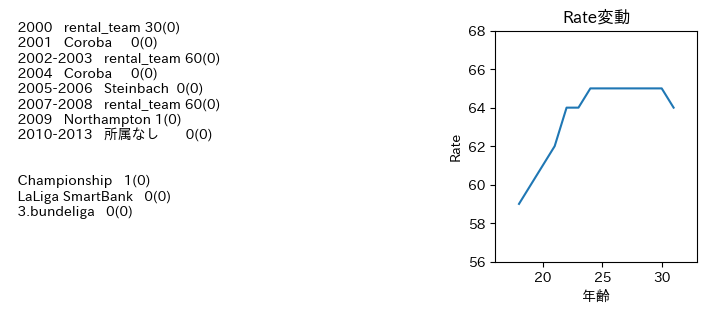

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,怪我欠場,怪我回数,賞,全ポジション回数
214,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,18,59,4,GK,rental_league,2000,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
5516,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,19,60,3,GK,LaLiga SmartBank,2001,Coroba,,リーグ,19位,0,0.0,0,0,0,0,0,,"{""GK"": 0}"
7097,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,20,61,2,GK,rental_league,2002,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
10403,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,21,62,1,GK,rental_league,2003,rental_team,Coroba,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
15696,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,22,64,0,GK,LaLiga SmartBank,2004,Coroba,,リーグ,19位,0,0.0,0,0,0,0,0,,"{""GK"": 0}"
19378,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,23,64,3,GK,3.bundeliga,2005,Steinbach,,リーグ,15位,0,0.0,0,0,0,0,0,,"{""GK"": 0}"
22686,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,24,65,2,GK,3.bundeliga,2006,Steinbach,,リーグ,6位,0,0.0,0,0,0,0,0,,"{""GK"": 0}"
23585,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,25,65,1,GK,rental_league,2007,rental_team,Steinbach,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
26930,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,26,65,2,GK,rental_league,2008,rental_team,Millwall,レンタルリーグ,記録なし,30,1800.0,0,0,0,0,0,,
32092,Davion,c332b5d6-5cf0-11ed-8261-00155d3c92e1,27,65,2,GK,Championship,2009,Northampton,,リーグ,19位,0,0.0,0,0,0,0,0,,"{""GK"": 0}"


In [91]:
uuid_ = "c332b5d6-5cf0-11ed-8261-00155d3c92e1"
print_player(ws, all_member, uuid_)

## 年ごとの結果

In [9]:
year = 2026
league_num = 0
league_name = f"{England.leagues[league_num].name}_{year}"
competition_name = f"FA杯_{year}"
England.leagues[league_num].team_result[league_name]
England.competition_result[competition_name]

NameError: name 'England' is not defined

In [98]:
output = ws.players_result
output.sort_values("Rate", ascending=False).head(30)

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,怪我欠場,怪我回数,賞,全ポジション回数
47840,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,29,96,1,GK,premier,2014,AFC,,リーグ,16位,23,1854.00,0,0,6,17,2,,"{""GK"": 23}"
51093,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,30,96,0,GK,premier,2015,AFC,,リーグ,13位,32,2538.00,0,0,9,9,2,,"{""GK"": 32}"
51118,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,30,96,0,GK,premier,2015,AFC,,カップ戦,13位,3,234.00,0,0,1,0,1,,"{""GK"": 3}"
34428,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,25,96,3,GK,La Liga Santander,2010,Leganes,,カップ戦,6位,5,414.00,0,0,3,1,0,,"{""GK"": 5}"
40953,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,27,96,1,GK,La Liga Santander,2012,Leganes,,カップ戦,2位,2,144.00,0,0,1,0,0,,"{""GK"": 2}"
47865,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,29,96,1,GK,premier,2014,AFC,,カップ戦,16位,1,72.00,0,0,0,1,0,,"{""GK"": 1}"
40928,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,27,96,1,GK,La Liga Santander,2012,Leganes,,リーグ,2位,35,2844.00,0,0,13,4,1,,"{""GK"": 35}"
37636,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,26,96,2,GK,La Liga Santander,2011,Leganes,,カップ戦,17位,1,90.00,0,0,1,2,0,,"{""GK"": 1}"
37611,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,26,96,2,GK,La Liga Santander,2011,Leganes,,リーグ,17位,16,1188.00,0,0,4,24,2,,"{""GK"": 16}"
34403,Derry,e6af44e8-5cf0-11ed-8261-00155d3c92e1,25,96,3,GK,La Liga Santander,2010,Leganes,,リーグ,6位,36,2934.00,0,0,11,3,1,,"{""GK"": 36}"


In [99]:
all_member.sort_values("年齢", ascending=False).head(30)

,名前,チーム,リーグ,uuid,年齢,生まれ年,ポジション,Rate,成長タイプ,pac,sho,pas,dri,def,phy,進退
0,Akhilesh,Dusseldorf,3.bundeliga,c3fda944-5cf0-11ed-8261-00155d3c92e1,41,1982,CB,56,general,50,32,39,25,55,53,引退
0,Crayton,Dusseldorf,3.bundeliga,c17e8ab2-5cf0-11ed-8261-00155d3c92e1,40,1982,LW,59,general,60,54,56,58,54,47,引退
0,Tavis,Dusseldorf,3.bundeliga,177c21ae-5cf1-11ed-8261-00155d3c92e1,40,1988,ST,64,genius,77,62,39,61,27,47,引退
0,Jerremy,Dusseldorf,3.bundeliga,c3ba7d36-5cf0-11ed-8261-00155d3c92e1,40,1982,CAM,60,general,50,58,59,58,42,51,引退
0,Scotty,Dusseldorf,3.bundeliga,c0d882ca-5cf0-11ed-8261-00155d3c92e1,40,1982,RM,57,general,50,49,56,58,58,40,引退
0,Quinton,Dusseldorf,3.bundeliga,c1f53572-5cf0-11ed-8261-00155d3c92e1,40,1972,GK,42,general,15,15,15,15,15,15,引退
0,Ormand,Dusseldorf,3.bundeliga,ff4f2496-5cf0-11ed-8261-00155d3c92e1,40,1986,LB,59,genius,65,27,50,49,58,45,引退
0,Jahquez,Dusseldorf,3.bundeliga,cf458b46-5cf0-11ed-8261-00155d3c92e1,40,1982,RB,60,general,62,31,53,53,60,49,引退
0,Willian,Dusseldorf,3.bundeliga,c0f8c062-5cf0-11ed-8261-00155d3c92e1,40,1980,GK,61,general,15,15,15,15,15,15,引退
0,Sabin,Dusseldorf,3.bundeliga,c36ff180-5cf0-11ed-8261-00155d3c92e1,40,1972,GK,47,general,15,15,15,15,15,15,引退


In [100]:
all_member[all_member["成長タイプ"]=="legend"]

,名前,チーム,リーグ,uuid,年齢,生まれ年,ポジション,Rate,成長タイプ,pac,sho,pas,dri,def,phy,進退
0,Thayden,Everton,premier,c48a12fc-5cf1-11ed-8261-00155d3c92e1,28,2001,CDM,90,legend,72,65,92,75,94,74,現役
0,Omer,Everton,premier,5716e604-5cf2-11ed-8261-00155d3c92e1,18,2011,RB,75,legend,84,34,69,63,67,66,現役
0,Vontrell,Middlesbrough,premier,8f894b22-5cf1-11ed-8261-00155d3c92e1,32,1997,GK,82,legend,15,15,15,15,15,15,現役
0,Laronn,Middlesbrough,premier,9d96f868-5cf1-11ed-8261-00155d3c92e1,31,1998,ST,87,legend,80,85,55,78,28,89,現役
0,Tyrice,AFC,premier,c485d64c-5cf1-11ed-8261-00155d3c92e1,28,2001,GK,83,legend,15,15,15,15,15,15,現役
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Thiago,Dusseldorf,3.bundeliga,74655b10-5cf1-11ed-8261-00155d3c92e1,33,1995,ST,77,legend,77,76,53,72,32,65,引退
0,Paxton,Dusseldorf,3.bundeliga,306e20a4-5cf1-11ed-8261-00155d3c92e1,38,1990,CB,64,legend,70,43,58,42,63,59,引退
0,Irvine,Dusseldorf,3.bundeliga,666a54ac-5cf1-11ed-8261-00155d3c92e1,35,1994,CAM,77,legend,65,67,78,78,73,48,引退
0,Eden,Dusseldorf,3.bundeliga,7467bb26-5cf1-11ed-8261-00155d3c92e1,34,1995,CB,71,legend,53,36,46,47,71,69,引退


## 全選手成績

In [93]:
output = ws.players_result
#output = output[output["チーム"]==ws.country_leagues[0].leagues[league_num].teams[team_num].name]
#output = output[output["分類"]=="リーグ"]
output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS", "怪我欠場"]].sort_values("試合数", ascending=False).head(20)

,試合数,goal,assist,CS,怪我欠場
uuid,,,,,
17855b16-5cf1-11ed-8261-00155d3c92e1,825,218,120,171,3
3065bc70-5cf1-11ed-8261-00155d3c92e1,809,207,117,169,57
ff4ab9e2-5cf0-11ed-8261-00155d3c92e1,795,54,49,194,20
c120341c-5cf0-11ed-8261-00155d3c92e1,792,27,14,170,40
da7fc652-5cf0-11ed-8261-00155d3c92e1,788,345,88,107,142
c3145a5a-5cf0-11ed-8261-00155d3c92e1,782,120,78,56,10
c147060a-5cf0-11ed-8261-00155d3c92e1,768,253,84,80,23
da83791e-5cf0-11ed-8261-00155d3c92e1,749,127,63,21,36
f2cd96d0-5cf0-11ed-8261-00155d3c92e1,748,218,82,125,0


,名前,年齢,生まれ年,成長タイプ
0,Kavion,37,1985,general


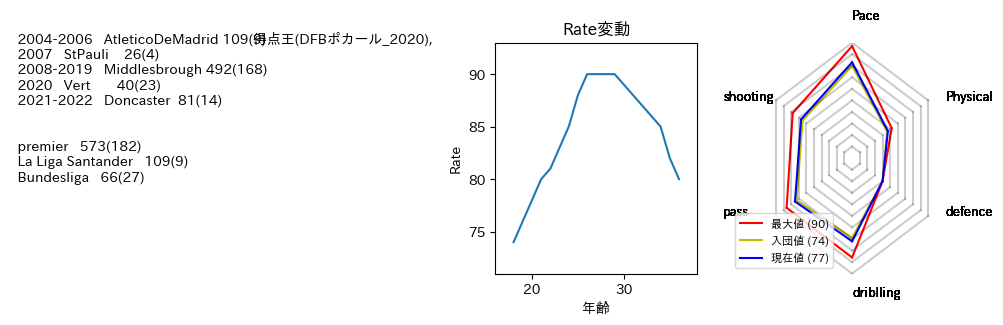

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,怪我欠場,怪我回数,賞,全ポジション回数
13806,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,18,74,5,LM,La Liga Santander,2004,AtleticoDeMadrid,,リーグ,10位,36,2088.00,4,2,3,0,0,,"{""RW"": 0, ""LM"": 31, ""RM"": 5}"
17159,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,19,76,4,LM,La Liga Santander,2005,AtleticoDeMadrid,,リーグ,16位,36,1258.50,3,0,2,0,0,,"{""LW"": 7, ""RM"": 7, ""LM"": 19, ""CM"": 3}"
20501,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,20,78,3,LM,La Liga Santander,2006,AtleticoDeMadrid,,リーグ,18位,33,1128.75,2,1,0,0,0,,"{""RW"": 3, ""LM"": 23, ""RM"": 5, ""ST"": 1, ""CM"": 1}"
24186,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,21,80,3,LM,Bundesliga,2007,StPauli,,リーグ,19位,26,1761.75,4,3,0,0,0,,"{""RW"": 0, ""LM"": 23, ""RM"": 3}"
28012,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,22,81,4,RW,premier,2008,Middlesbrough,,リーグ,17位,38,2924.25,8,1,5,0,0,,"{""RW"": 38}"
31226,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,23,83,3,RW,premier,2009,Middlesbrough,,リーグ,7位,38,2963.25,14,5,10,0,0,,"{""LW"": 0, ""RW"": 38}"
34513,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,24,85,2,RW,premier,2010,Middlesbrough,,リーグ,11位,38,2932.50,15,8,8,0,0,,"{""RW"": 38}"
37772,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,25,88,1,RW,premier,2011,Middlesbrough,,リーグ,6位,38,2967.00,16,4,7,0,0,,"{""RW"": 38}"
41048,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,26,90,0,RW,premier,2012,Middlesbrough,,リーグ,1位,38,2934.00,17,5,10,0,0,,"{""LW"": 0, ""RW"": 38}"
44349,Kavion,f2cd96d0-5cf0-11ed-8261-00155d3c92e1,27,90,3,RW,premier,2013,Middlesbrough,,リーグ,10位,38,2941.50,17,5,6,0,0,,"{""RW"": 38}"


In [96]:
uuid_ = "f2cd96d0-5cf0-11ed-8261-00155d3c92e1"
print_player(ws, all_member, uuid_)

## データ保存

In [ ]:
with open('../data/pickle/20221011v2_30y.pickle', mode='wb') as f:
    pickle.dump(England, f)